In [1]:
# Import Gaia querying
from astroquery.gaia import Gaia

# Import astropy utilities for querying
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

In [2]:
# Choose the Gaia data release for querying
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

In [3]:
# Select the coordinates of M67
# From SIMBAD:

#Hexagesmal coordinates
ra_hex = "08h51m23.0s"
dec_hex = "+11d48m50s"
radius = 25*u.arcmin #Note this is "some" radius and is unlikely to contain all cluster stars

# Create SkyCoord object
coord = SkyCoord(ra_hex, dec_hex, frame='icrs')  

In [4]:
# Run the query
r = Gaia.query_object_async(coordinate=coord, radius=radius*2)  #Twice the radius to be conservative.

INFO: Query finished. [astroquery.utils.tap.core]


In [5]:
#Print the output to make sure we got what we want
r.pprint(max_lines=10, max_width=130)

    solution_id             designation             source_id      ... libname_gspphot          dist        
                                                                   ...                                      
------------------- --------------------------- ------------------ ... --------------- ---------------------
1636148068921376768 Gaia DR3 604917629355038848 604917629355038848 ...                 0.0004364914968263516
1636148068921376768 Gaia DR3 604917698073552640 604917698073552640 ...                 0.0034028623437938645
                ...                         ...                ... ...             ...                   ...
1636148068921376768 Gaia DR3 604917320118983936 604917320118983936 ...         PHOENIX   0.02327160392757514
1636148068921376768 Gaia DR3 604918041671889792 604918041671889792 ...           MARCS  0.023383656383475424
1636148068921376768 Gaia DR3 604917526276009344 604917526276009344 ...                  0.024183381408352043
Length = 50 rows


In [6]:
# Notice that the length is 50 rows.  This is a limitation of the query, and we want *all* of the stars.  Setting the row limit to -1 does this.
Gaia.ROW_LIMIT = -1

# Run the query again
r = Gaia.query_object_async(coordinate=coord, radius=radius*2)

# Print the output to make sure we got what we want
r.pprint(max_lines=10, max_width=130)

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation             source_id      ... libname_gspphot          dist        
                                                                   ...                                      
------------------- --------------------------- ------------------ ... --------------- ---------------------
1636148068921376768 Gaia DR3 604917629355038848 604917629355038848 ...                 0.0004364914968263516
1636148068921376768 Gaia DR3 604917698073552640 604917698073552640 ...                 0.0034028623437938645
                ...                         ...                ... ...             ...                   ...
1636148068921376768 Gaia DR3 604742600847914112 604742600847914112 ...                    0.8333075110914527
1636148068921376768 Gaia DR3 598668035326783872 598668035326783872 ...                    0.8333088498566988
1636148068921376768 Gaia DR3 598661476911879808 598661476911879808 ...        

In [7]:
# The query returns a table, and we can use the data for analysis.

# But first, we need to know what it returned!

print(r.columns)

<TableColumns names=('solution_id','designation','source_id','random_index','ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pm','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_n_obs_al','astrometric_n_obs_ac','astrometric_n_good_obs_al','astrometric_n_bad_obs_al','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_params_solved','astrometric_primary_flag','nu_eff_used_in_astrometry','pseudocolour','pseudocolour_error','ra_pseudocolour_corr','dec_pseudocolour_corr','parallax_pseudocolour_corr','pmra_pseudocolour_corr','pmdec_pseudocolour_corr','astrometric_matched_transits','visibility_periods_used','astrometric_sigma5d_max','matched_transits','new_matched_transits','matched_transits_removed','ip

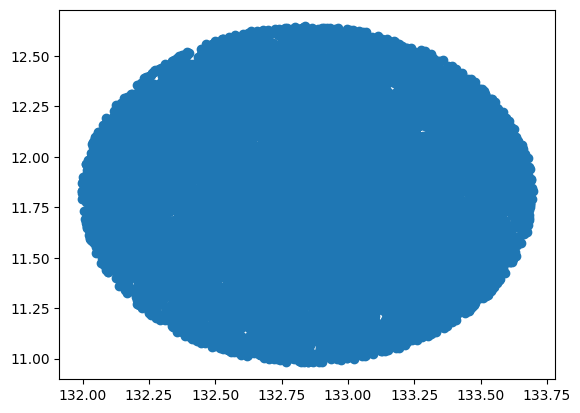

In [8]:
# That is a lot!  Consult the Gaia website to know what each is *and their units!*

# Now analysis:
# Plot the RA and Dec for the stars.

import matplotlib.pyplot as plt

plt.scatter(r["ra"], r["dec"])
plt.show()

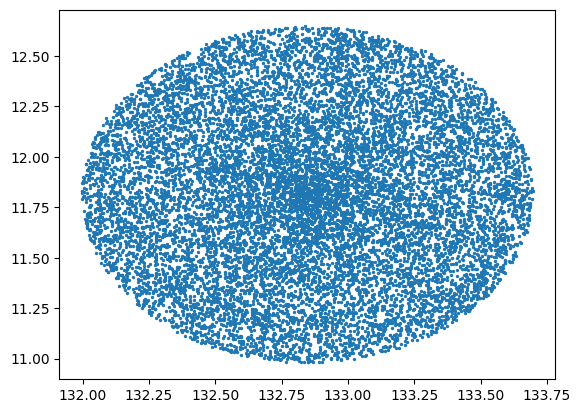

In [9]:
# Points are way too big!  We can't see individual stars.

plt.scatter(r["ra"], r["dec"], s=2)
plt.show()

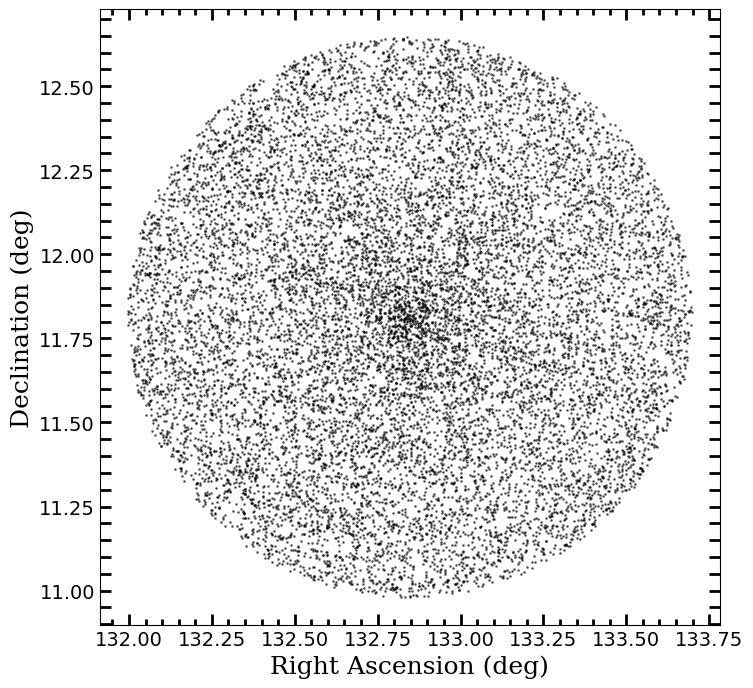

In [10]:
# Better, and there is clearly an overdensity near the center, but still a little blobby.

# Here we can make some additional improvements to make things convey the information better (and be more aesthetic)

from matplotlib.ticker import AutoMinorLocator, LogLocator

fig, ax1 = plt.subplots(figsize=(8, 8)) #Set the figure size to be a square, which is appropriate for a circle on the sky.

ax1.scatter(r["ra"], r["dec"], s=1, alpha=0.5, color='black') #Change the point size and opacity to make it easier to see everything.  Change color to black - always better to keep things simple and easier for printing when possible.
ax1.set_xlabel(r"Right Ascension (deg)", fontfamily="serif", fontsize=18) #Alway label your axes with units!
ax1.set_ylabel(r"Declination (deg)", fontfamily="serif", fontsize=18)
ax1.tick_params(axis='both', right=True, top=True, width=2, length=8, direction='in', which='both', labelsize=14) #Inward pointing ticks are so much easier to see where the *data* are.  Also, let's have ticks on all sides.
ax1.tick_params(axis='x', which='minor', length=4, width=2, direction='in') #Let's not forget minor tickmarks.
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

#plt.savefig('m67_coords.pdf', format='pdf')
plt.show()

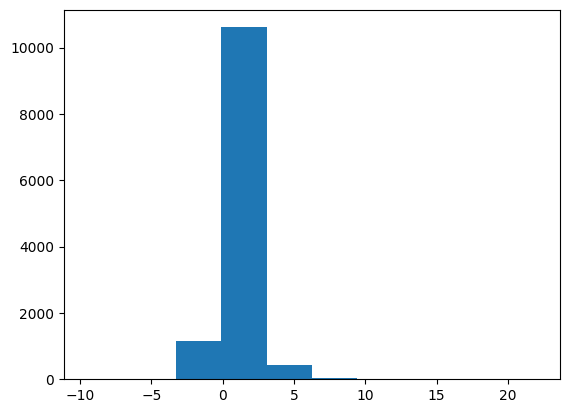

In [11]:
# Now let's try a histogram for the parallax.

plt.hist(r["parallax"])
plt.show()

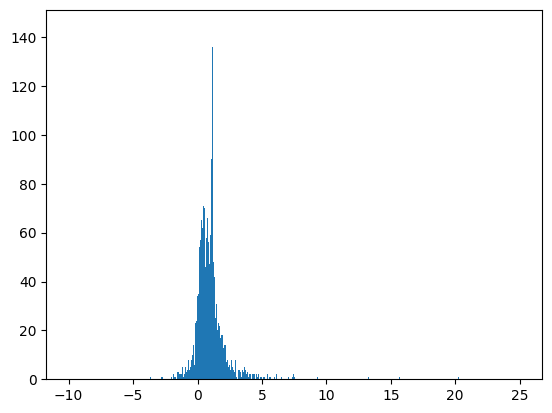

In [12]:
# The default bins are way too big to be meaningful.

# Finally need to import numpy
import numpy as np

plt.hist(r["parallax"], bins=np.arange(-10,25,0.01))
plt.show()

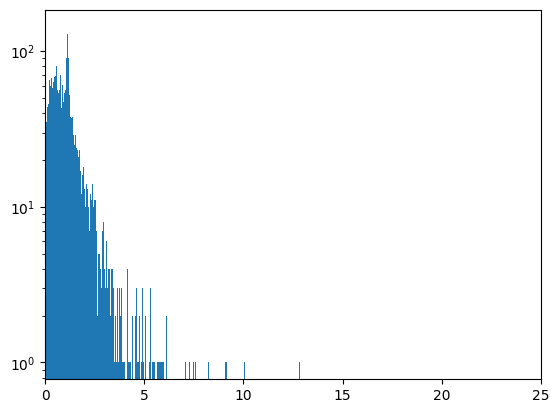

In [13]:
# This is great, but we need to zoom in more to see what is meaningful.

# First, some physical understanding.  We don't care about negative parallax (I'll leave it to the coder to determine why).
# And we can initially set the y axis as log.

plt.hist(r["parallax"], bins=np.arange(-10,25,0.01), log=True)
plt.xlim(0, 25)
plt.show()

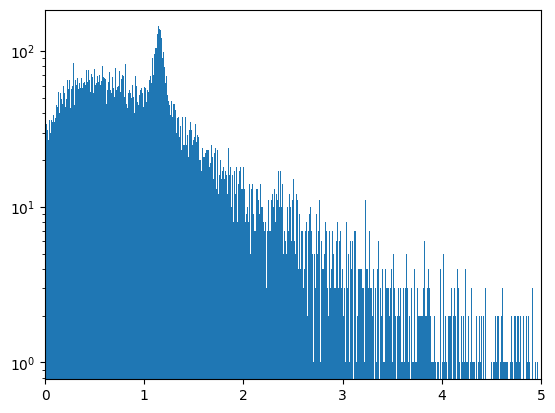

In [14]:
# Clearly the action is for parallax < 5.  In fact, you can probably already see the cluster peak.

plt.hist(r["parallax"], bins=np.arange(-10,25,0.01), log=True)
plt.xlim(0, 5)
plt.show()

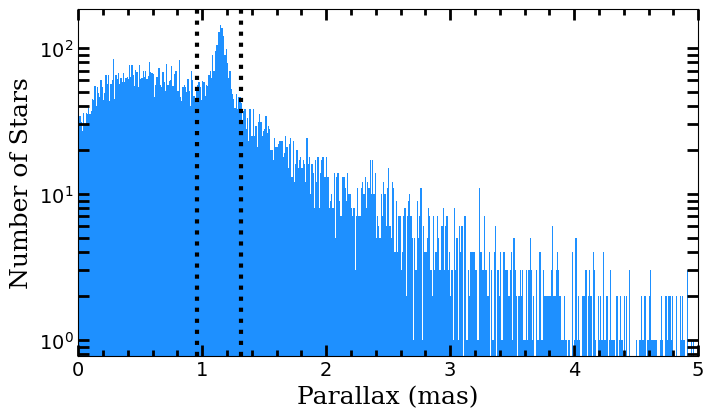

In [15]:
# Now we can make a nice plot showing where we think the cluster is.

fig, ax1 = plt.subplots(figsize=(16/2., 9/2.)) #16x9 ratio is visually appealing, close to the Golden Ratio

ax1.hist(r["parallax"], bins=np.arange(-10,25,0.01), log=True, color="dodgerblue")
ax1.set_xlabel(r"Parallax (mas)", fontfamily="serif", fontsize=18) #Make sure you know your units!
ax1.set_ylabel(r"Number of Stars", fontfamily="serif", fontsize=18)
ax1.tick_params(axis='both', right=True, top=True, width=2, length=8, direction='in', which='both', labelsize=14) #Inward pointing ticks are so much easier to see where the *data* are.  Also, let's have ticks on all sides.
ax1.tick_params(axis='x', which='minor', length=4, width=2, direction='in')
plt.xlim(0, 5)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(LogLocator(base=10, subs=[2,3,4,5,6,7,8,9]))

# Conservatively select the cluster
p_min = 0.96
p_max = 1.31

ax1.axvline(x=p_min, lw=3, ls=":", color="black")
ax1.axvline(x=p_max, lw=3, ls=":", color="black")

#plt.savefig('m67_parallax.pdf', format='pdf')
plt.show()

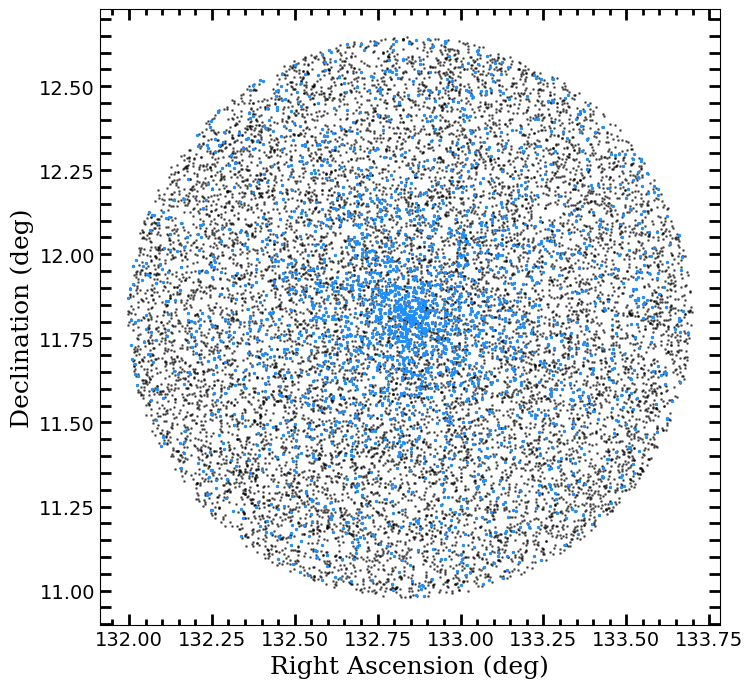

In [16]:
# Now, we can use the parallax to select stars consistent with the cluster and plot the coordinates again

ind = (r["parallax"] > p_min) & (r["parallax"] < p_max)

fig, ax1 = plt.subplots(figsize=(8, 8))

ax1.scatter(r["ra"], r["dec"], s=1, alpha=0.5, color='black')
ax1.scatter(r["ra"][ind], r["dec"][ind], s=2, alpha=1, color='dodgerblue')
ax1.set_xlabel(r"Right Ascension (deg)", fontfamily="serif", fontsize=18) #Alway label your axes with units!
ax1.set_ylabel(r"Declination (deg)", fontfamily="serif", fontsize=18)
ax1.tick_params(axis='both', right=True, top=True, width=2, length=8, direction='in', which='both', labelsize=14) #Inward pointing ticks are so much easier to see where the *data* are.  Also, let's have ticks on all sides.
ax1.tick_params(axis='x', which='minor', length=4, width=2, direction='in') #Let's not forget minor tickmarks.
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

#plt.savefig('m67_coords_parallax.pdf', format='pdf')
plt.show()

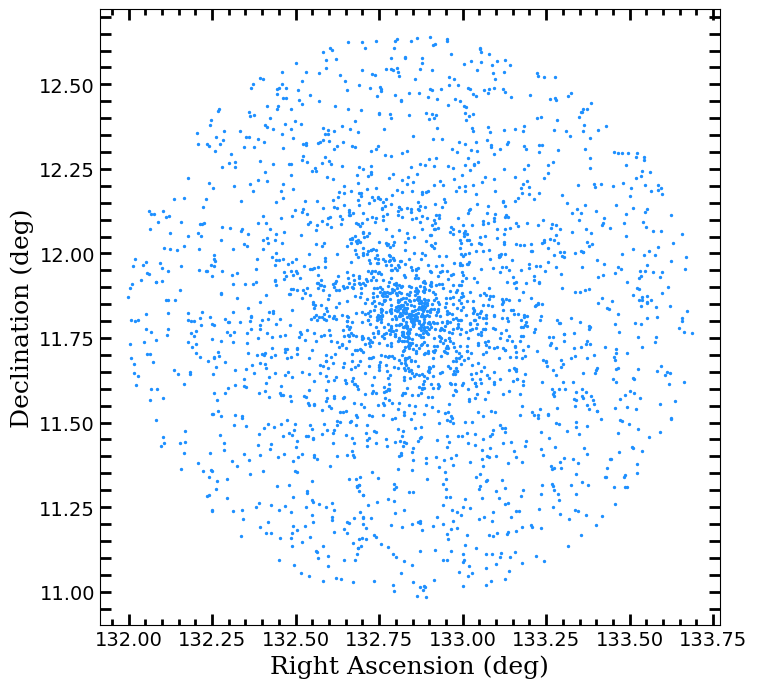

In [17]:
# You can see that the stars at that distance are more clustered!

# Now to plot just the stars at the cluster distance

fig, ax1 = plt.subplots(figsize=(8, 8))

ax1.scatter(r["ra"][ind], r["dec"][ind], s=2, alpha=1, color='dodgerblue')
ax1.set_xlabel(r"Right Ascension (deg)", fontfamily="serif", fontsize=18) #Alway label your axes with units!
ax1.set_ylabel(r"Declination (deg)", fontfamily="serif", fontsize=18)
ax1.tick_params(axis='both', right=True, top=True, width=2, length=8, direction='in', which='both', labelsize=14) #Inward pointing ticks are so much easier to see where the *data* are.  Also, let's have ticks on all sides.
ax1.tick_params(axis='x', which='minor', length=4, width=2, direction='in') #Let's not forget minor tickmarks.
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

#plt.savefig('m67_coords_culled.pdf', format='pdf')
plt.show()